# Start Python and Check Versions

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
scipy: 1.3.1
numpy: 1.16.5
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3


# Load The Data

## Import libraries

In [2]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import os

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

# Get Data (Common Mothed for KNN, Decision Tree and Random Forest)

In [4]:
def get_data_set():
    file = os.path.join('..', 'Resources','Crimes_selected.csv')
    df = pd.read_csv(file)
    return df

#   XY array  && Splitting the data (Common Mothed for KNN, Dtree and RFC)

In [5]:
def get_train_test(X_values, y_values):
    df = get_data_set()
    X=df.iloc[:,[ c2 for c2 in  [df.columns.get_loc(c1) for c1 in X_values if c1 in df ] if c2 <=9 or c2 >=16 ]].values
    y=df.iloc[:,[ c2 for c2 in  [df.columns.get_loc(c1) for c1 in y_values if c1 in df ] if c2 >=10 and c2 <=15 ]].values
    #X = [ c2 for c2 in  [df.columns.get_loc(c1) for c1 in X_values if c1 in df ] if c2 <=9 or c2 >=16 ]
    #y = [ c2 for c2 in  [df.columns.get_loc(c1) for c1 in y_values if c1 in df ] if c2 >=10 and c2 <=15 ]
    return train_test_split(X, y, test_size=0.20, random_state=50)

# Creating & Training KNN Model 

In [6]:
def get_knn_score(X_train, X_test, y_train, y_test):
    #X_train, X_test, y_train, y_test = get_train_test(X_values, y_values)
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)
    #print("test score=", test_score, "train score=", train_score)
    return test_score, train_score

## Elbow Method For optimum value of K

In [7]:
def get_knn_optimum_value(X_train, X_test, y_train, y_test):
    error_rate = []
    for i in range(1,140): 
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(numpy.mean(pred_i != y_test))
    plt.figure(figsize=(10,6))
    plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

# TEST CODE

test score= 0.6014492753623188 train score= 0.6831922611850061


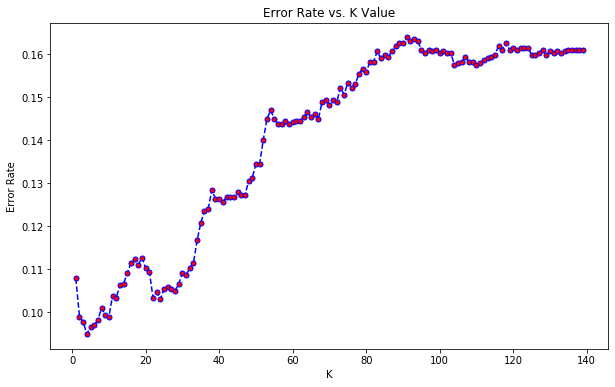

In [8]:
if __name__ == "__main__": 
    # knn  example, 
    # you can duplicate this code in flask and show test_score, train_score and the plot from get_knn_optimum_value in html page
    # you can have a dropdown to select  X_value and y_value in the xtml page.
    X_values = ['month', 'day', 'hour', 'dayofyear', 'weekofyear', 'Latitude', 'Longitude']
    y_values = ['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary']
    X_train, X_test, y_train, y_test = get_train_test(X_values, y_values)
    test_score, train_score = get_knn_score(X_train, X_test, y_train, y_test)
    print("test score=", test_score, "train score=", train_score)
    get_knn_optimum_value(X_train, X_test, y_train, y_test)   

## Creating & Training Decision Tree Model

In [9]:
def decision_tree(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeClassifier
    dtree = DecisionTreeClassifier(max_depth=500, random_state=300)
    dtree.fit(X_train,y_train)
    return dtree

def get_dtree_score(dtree):
    y_pred=dtree.predict(X_test)
    test_score = dtree.score(X_test,y_test)
    train_score = dtree.score(X_train,y_train)
    return test_score, train_score
    
def display_tree_model(dtree):
    treefeatures=dtree.feature_importances_
    indices = numpy.argsort(treefeatures)
    plt.figure(1)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
    plt.xlabel('Relative Importance')

# Tree visualation

In [10]:
def tree_visualization(dtree, feature_names):
    #  To run this tree visulation:
    #   conda install pydot-ng 
    #   conda install graphviz
    #   execute graphviz-2.38.msi from https://graphviz.gitlab.io/_pages/Download/Download_windows.html 
    from IPython.display import Image  
    from sklearn.externals.six import StringIO  
    from sklearn.tree import export_graphviz
    import pydot 
    from sklearn.tree import DecisionTreeClassifier
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    dot_data = StringIO()  
    export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph[0].create_png()))

# TEST CODE

dtree test_score= 0.6594202898550725    dtree train_score= 1.0


C:\Users\skao2\Anaconda3\envs\PythonData\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


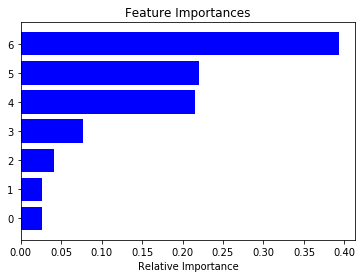

In [11]:
if __name__ == "__main__": 
    # desion tree  example, 
    # you can duplicate this code in flask and show the plot from decision_tree in html page
    # you can have a dropdown to select  X_value and y_value in the html page.
    X_values = ['month', 'day', 'hour', 'dayofyear', 'weekofyear', 'Latitude', 'Longitude']
    y_values = ['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary']
    X_train, X_test, y_train, y_test = get_train_test(X_values, y_values)
    dtree = decision_tree(X_train, X_test, y_train, y_test)
    test_score, train_score = get_dtree_score(dtree)
    print( "dtree test_score=", test_score, "   dtree train_score=", train_score)
    display_tree_model(dtree)
    tree_visualization(dtree, feature_names=X_values)

## Creating & Training Random Tree Model

In [12]:
def random_forest(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)
    return rfc

def get_rfc_score(rfc):
    y_pred=rfc.predict(X_test)
    test_score = rfc.score(X_test,y_test)
    train_score = rfc.score(X_train,y_train)
    return test_score, train_score
    
def display_rfc_model(rfc):
    df = get_data_set()
    om=rfc.feature_importances_
    indices = numpy.argsort(om)
    features = df.columns
    plt.figure(1)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), om[indices], color='b', align='center')
    plt.yticks(range(len(indices)), features[indices])
    plt.xlabel('Relative Importance')

# TEST CODE

rfc test_score= 0.5676328502415459    rfc train_score= 1.0


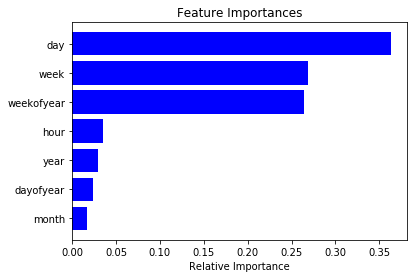

In [13]:
if __name__ == "__main__": 
    # rfc  example, 
    # you can duplicate this code in flask and show the plot from decision_tree in html page
    # you can have a dropdown to select  X_value and y_value in the html page.
    X_values = ['month', 'day', 'hour', 'dayofyear', 'weekofyear', 'Latitude', 'Longitude']
    y_values = ['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary']
    X_train, X_test, y_train, y_test = get_train_test(X_values, y_values)
    rfc = random_forest(X_train, X_test, y_train, y_test)
    test_score, train_score = get_rfc_score(rfc)
    print( "rfc test_score=", test_score, "   rfc train_score=", train_score)
    display_rfc_model(rfc)
    rfc = random_forest(X_train, X_test, y_train, y_test)